# Edge Detection
In this part, I studied the edge detection method using Sobel Filter, Canny Edge Detection and Gaussian-Laplace filtering, and also plotted and analyzed precision-recall curves and F-measure to evaluate each of the above edge detectors

### Part A

First, read in and display the images


Original Images


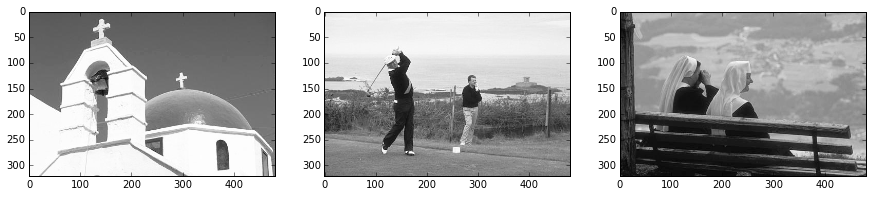

GT Images


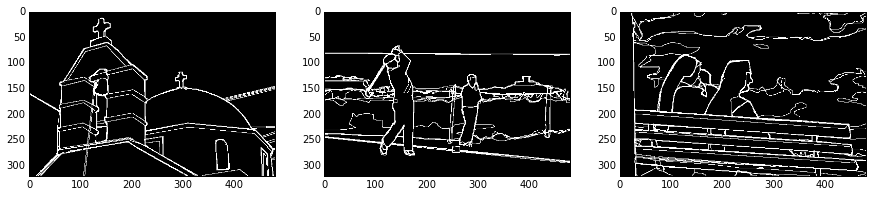

In [556]:
eimg1 = misc.imread('./Images/Q3/Church.jpg',0)
eimg1gt = misc.imread('./Images/Q3/Church_GT.bmp',0)
eimg2 = misc.imread('./Images/Q3/Golf.jpg',0)
eimg2gt = misc.imread('./Images/Q3/Golf_GT.bmp',0)
eimg3 = misc.imread('./Images/Q3/Nuns.jpg',0)
eimg3gt = misc.imread('./Images/Q3/Nuns_GT.bmp',0)

print "\nOriginal Images"
display3(eimg1,eimg2,eimg3, cm.Greys_r)
print "GT Images"
display3(eimg1gt,eimg2gt,eimg3gt, cm.Greys_r)

### Canny Edge Detection

Sigma:  0.5


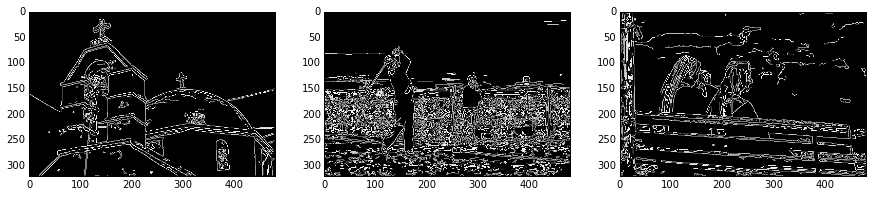

Sigma:  1.0


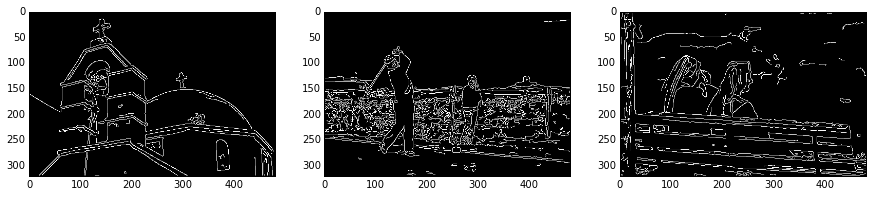

Sigma:  1.5


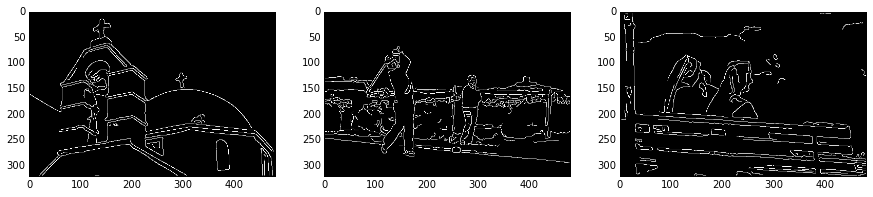

Sigma:  2.0


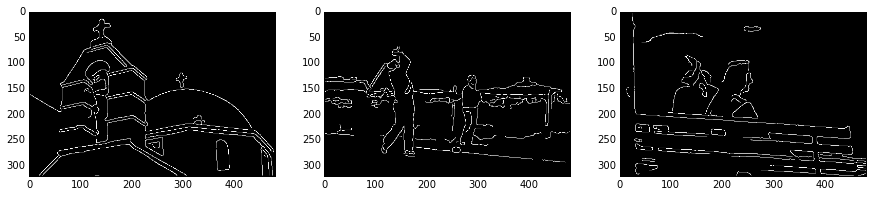

Sigma:  2.5


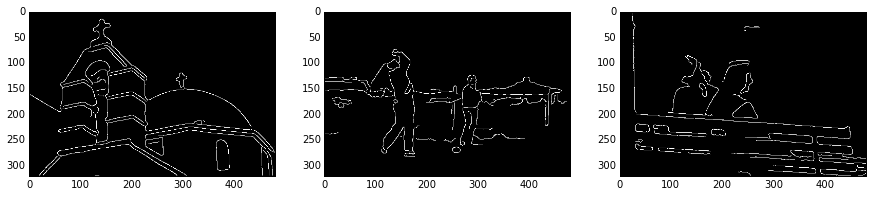

Sigma:  3.0


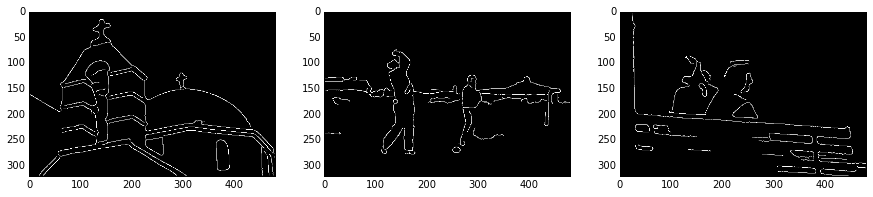

In [579]:
for sigma in np.arange(1,7):
    print "Sigma: ", sigma/2.0
    display3(canny(eimg1, sigma=sigma/2.0),canny(eimg2, sigma=sigma/2.0),canny(eimg3, sigma=sigma/2.0), cm.Greys_r)

Based on the above results, 1.5 is found to be the best parameter value for sigma

### Sobel Filtering

Sobel Filter output without thresholding


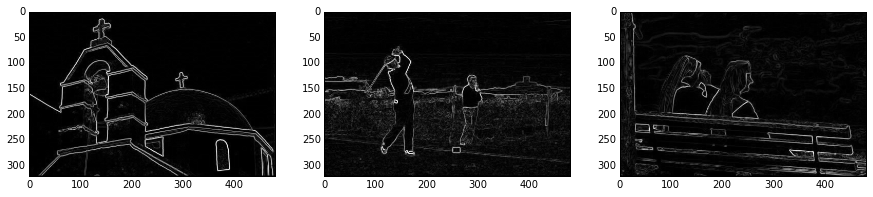

Otsu thresholds for: 
image1 = 0.137356169245 
image2 = 0.109153804057 
image3 = 0.0889513681665

Sobel Filter output with global thresholding using otsu method


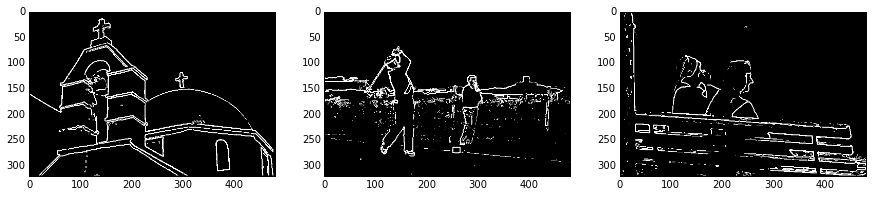

In [594]:
from skimage.filters import sobel, threshold_otsu

def global_threshold(eimg):
    threshold = threshold_otsu(eimg)
    eimg_threshold = eimg > threshold
    return eimg_threshold, threshold

eimg1_sobel = sobel(eimg1)
eimg2_sobel = sobel(eimg2)
eimg3_sobel = sobel(eimg3)

eimg1_sobel_thresholded, otsu1 = global_threshold(eimg1_sobel)
eimg2_sobel_thresholded, otsu2 = global_threshold(eimg2_sobel)
eimg3_sobel_thresholded, otsu3 = global_threshold(eimg3_sobel)

print "Sobel Filter output without thresholding"
display3(eimg1_sobel, eimg2_sobel, eimg3_sobel, cm.Greys_r)

print "Otsu thresholds for: \nimage1 =", otsu1, "\nimage2 =", otsu2, "\nimage3 =", otsu3

print "\nSobel Filter output with global thresholding using otsu method"
display3(eimg1_sobel_thresholded, eimg2_sobel_thresholded, eimg3_sobel_thresholded, cm.Greys_r)

We use otsu thresholding to arrive at the most suitable threshold. This is image specific and we get the following thresholds for each image:

**image1 threshold = 0.137356169245 **

**image2 threshold = 0.109153804057 **

**image3 threshold = 0.0889513681665**




### Gaussian-Laplace Filtering

Gaussian-Laplace filtering, sigma = 2 , threshold = 1


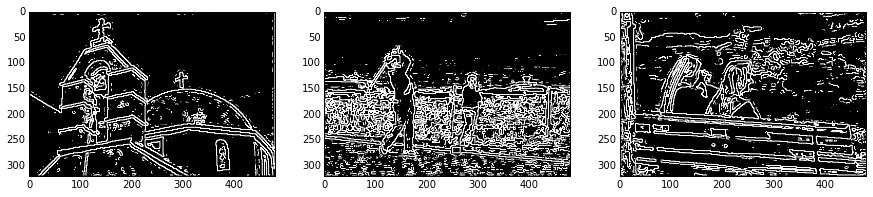

Gaussian-Laplace filtering, sigma = 2 , threshold = 2


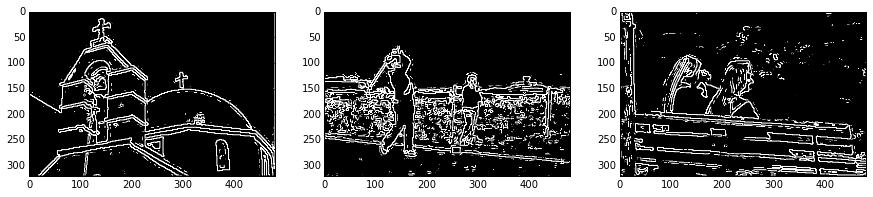

Gaussian-Laplace filtering, sigma = 2 , threshold = 3


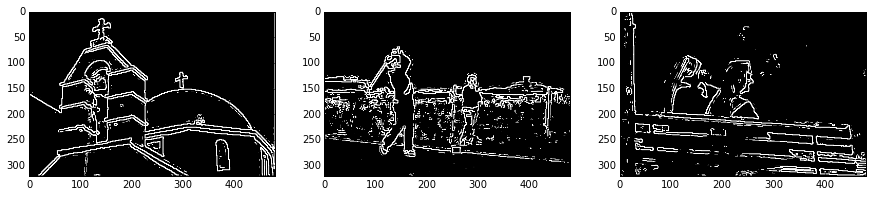

Gaussian-Laplace filtering, sigma = 3 , threshold = 1


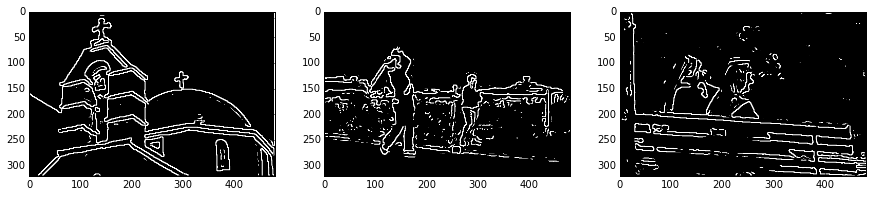

Gaussian-Laplace filtering, sigma = 3 , threshold = 2


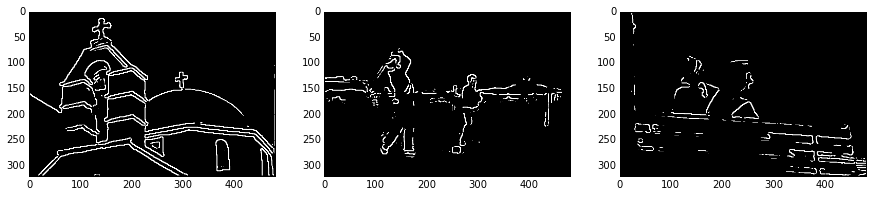

Gaussian-Laplace filtering, sigma = 4 , threshold = 1


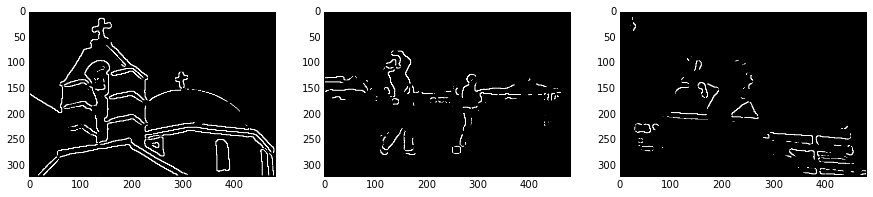

Gaussian-Laplace filtering, sigma = 4 , threshold = 2


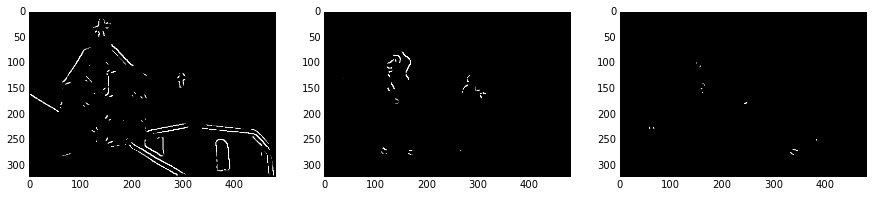

In [609]:
# Reference: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.ndimage.filters.gaussian_laplace.html#scipy.ndimage.filters.gaussian_laplace

def laplace_of_gaussian(img, sigma, threshold):
    log_img = ndimage.gaussian_laplace(img, sigma)
    log_edge_img = scipy.zeros(log_img.shape)
    w, h = log_edge_img.shape[1], log_edge_img.shape[0]
    for i in range(1, h - 1):
        for j in range(1, w - 1):
            # we take a 3x3 patch to check for zero crossings in the middle
            # we do this as the discretized values may or may not have zeros 
            # and we need to detect change in signs across the patch instead
            patch = log_img[i-1:i+2, j-1:j+2] 
            p = log_img[i, j]
            max_p = patch.max()
            min_p = patch.min()
            if (p > 0):
                is_zero_crossing = True if min_p < 0 else False
            else:
                is_zero_crossing = True if max_p > 0 else False
            if ((max_p - min_p) > threshold) and is_zero_crossing:
                log_edge_img[i, j] = 1
    return log_edge_img

img1_32 = np.asarray(eimg1, dtype="float32" )
img2_32 = np.asarray(eimg2, dtype="float32" )
img3_32 = np.asarray(eimg3, dtype="float32" )

# threshold 0-30
def plot_laplace_of_gaussian(sigma,threshold):
    print "Gaussian-Laplace filtering, sigma =",sigma,", threshold =", threshold
    out1 = laplace_of_gaussian(img1_32,sigma,threshold)
    out2 = laplace_of_gaussian(img2_32,sigma,threshold)
    out3 = laplace_of_gaussian(img3_32,sigma,threshold)
    display3(out1,out2,out3,cm.Greys_r)
    return out1,out2,out3

plot_laplace_of_gaussian(2,1)
plot_laplace_of_gaussian(2,2)
plot_laplace_of_gaussian(2,3)
plot_laplace_of_gaussian(3,1)
plot_laplace_of_gaussian(3,2)
plot_laplace_of_gaussian(4,1)
plot_laplace_of_gaussian(4,2)
print ""

Based on the results above, we find that the optimal parameter values are as follows:

**sigma = 3** and **threshold = 1**

### Explainations
**1. The way of operation of each of the three detectors**

**Canny Edge Detection:** Here, first smooth the image with a Gaussian filter to remove noise which corresponds to high frequency signals. Then, get the gradient along the horizontal and vertical axes of the denoised image. Note, this can be done in one step by convolving the image with the Derivative-of-Gradient operator because of the associative property of filter convolution. After this, suppress non-maxima values along the direction of the gradient (non-maximum suppression). Next, perform thresholding on the gradient values. Finally, try to get rid of edges that are not long and are not connected to any other edges as these are likely to be noise.

**Sobel Filtering:** I convolve the image with the Sobel masks in the X and Y directions. Then threshold the gradient magnitude with a suitable value of threshold setting all values above as 1 and all values below as 0. It can additionally do non-maximum suppression to reduce edge-thickness.

**Gaussian-Laplace Filtering:** First, smooth the image with a Gaussian filter to remove noise. Then apply the Laplacian operator (in both X and Y direction) to the smoothed image. This can be done in a single step by convolving the Laplacian of the Gaussian (LoG) with the image. As the Laplacian is effectively the second derivative, the edge maxima will be represented by 0s in the LoG image. We next have to detect the zero crossings where LoG the value goes from -threshold/2 to +threshold/2 or vice versa and set these to 1 and all other places to 0. These 1s will then correspond to the edges.

**2. The threshold parameter and the sigma parameter of the detectors**

**Canny Edge Detection:** Here, sigma is the standard deviation of the Gaussian used to smooth the image prior to applying the gradient operator. Increasing sigma removes an increasing amount of high frequency components from the image. Since the edges are also high-frequency portions of the image, increasing the sigma beyond an optimal value starts removing the edges from the image as well. This is observed in the output for canny edge detector above. Also, 1.5 is found to be the best parameter value for sigma.

**Sobel Filtering:**  The threshold is applied to gradient magnitude by setting all values above the threshold as 1 and all values below as 0. The lower the threshold, the thicker the edges and the higher the noise that will be included in the edges. In our implementation, we use Otsu Thresholding, which performs clustering on the image gradient to identify suitable value of threshold. This identifies a different threshold value for each image. The values we determined are:
image1 threshold = 0.137356169245
image2 threshold = 0.109153804057
image3 threshold = 0.0889513681665


**Gaussian-Laplace Filtering:** Here, sigma is again the standard deviation of the Gaussian used to smooth the image prior to applying the gradient operator. Increasing sigma removes an increasing amount of high frequency components from the image. Since the edges are also high-frequency portions of the image, increasing the sigma beyond an optimal value starts removing the edges from the image as well. 

The threshold is minimum jump in the Laplace of Gaussian (LoG) of image's values at a potential zero-crossing we find. Increasing the value of the threshold will result in a higher number of edge detections and beyond an optimal point, will start including a lot of noise as well. 

Based on the experiments above, the optimal values for sigma and threshold are sigma = 3 and threshold = 1


**3. Why the edges are supposed to be closed curves when running with the Gaussian-Laplace method with threshold = 0**

Below is the Gaussian-Laplace (LoG) method with threshold = 0. The edges form closed curves. Zero threshold means no minimum value between a zero crossing's next element and it's previous element along the LoG gradient direction. The zero crossings always lie on closed contours. The reason why this happens can be imagined by thinking of the image as a topographical map. The zero-crossings are simply the points with an altitude of zero. These will then lie on closed contours.

Since all of the zero crossings are included in the output for threshold = 0, the final output has only closed curves (except near the image edges where it may not be closed). 

Gaussian-Laplace filtering, sigma = 4 , threshold = 0


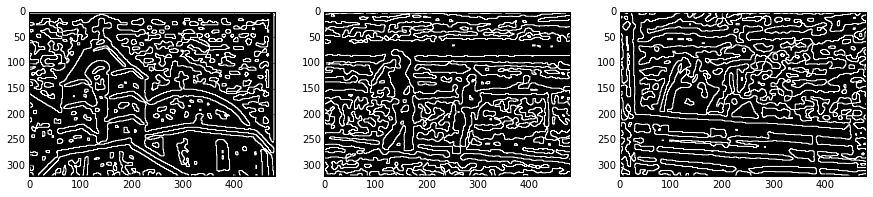

In [612]:
plot_laplace_of_gaussian(4,0)
print ""

### Creative detection method

One problem I note with the sobel filter is the presence of a lot of noise in the detected edges for the image with the golfers in it (image 2). One way to solve this problem will be to apply a median filter to the sobel gradient image to remove tiny white regions in the background before thresholding it. As can be seen below, applying the median filter does remove the noisy edge detections in the grass and bushes behind the golfers to a certain extent

Prior to removing noisy edge detections in the grass


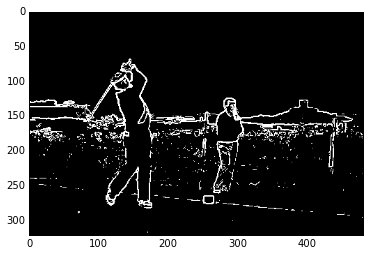

After removing noisy edge detections in the grass using median filter


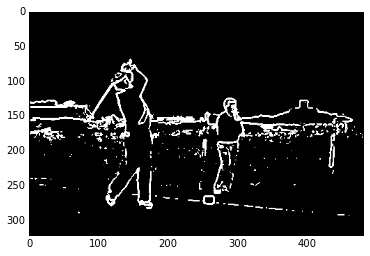

In [632]:
img_with_noise, otsu_temp = global_threshold(eimg2_sobel)
print "Prior to removing noisy edge detections in the grass"
display(img_with_noise, cm.Greys_r)

mfimg = scipy.ndimage.filters.median_filter(eimg2_sobel, 2)
imgb, otsub = global_threshold(mfimg)
print "After removing noisy edge detections in the grass using median filter"
display(imgb, cm.Greys_r)

In [ ]:
# Imports

%matplotlib inline
import numpy as np
import scipy
from scipy import signal
from scipy import misc
from matplotlib import pylab as plt
import matplotlib.cm as cm
import cv2
from scipy import ndimage
from scipy import misc
from sklearn.utils import shuffle
from sklearn import cross_validation
from sklearn.cluster import KMeans
from skimage.feature import canny